In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
curr = pd.read_excel(r'C:\Users\hp\Documents\Time Series\Currency.xlsx', index_col='Date', parse_dates=True)

In [3]:
curr.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-03-08,82.12,82.21,82.38,82.08,2.96M,0.0011
2023-03-06,82.03,81.95,82.07,81.71,3.35M,-0.0006
2023-03-03,82.07,82.55,82.60,82.02,3.95M,-0.0076
2023-03-02,82.71,82.60,82.72,82.60,1.38M,0.0011
2023-03-01,82.61,82.64,82.75,82.49,2.45M,-0.0012


In [4]:
curr.tail()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2015-02-05,61.97,62.15,62.24,61.93,1.18M,-0.0011
2015-02-04,62.04,61.90,62.15,61.82,1.19M,0.0008
2015-02-03,61.99,61.92,62.14,61.90,1.42M,-0.0021
2015-02-02,62.12,62.31,62.35,62.05,1.03M,-0.0018
2015-01-30,62.23,62.19,62.35,62.00,1.63M,0.0011


In [5]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1968 entries, 2023-03-08 to 2015-01-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1968 non-null   float64
 1   Open    1968 non-null   float64
 2   High    1968 non-null   float64
 3   Low     1968 non-null   float64
 4   Volume  1968 non-null   object 
 5   Chg%    1968 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.6+ KB


In [6]:
curr = curr.sort_index(ascending=[True])

In [7]:
curr.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2015-01-30,62.23,62.19,62.35,62.00,1.63M,0.0011
2015-02-02,62.12,62.31,62.35,62.05,1.03M,-0.0018
2015-02-03,61.99,61.92,62.14,61.90,1.42M,-0.0021
2015-02-04,62.04,61.90,62.15,61.82,1.19M,0.0008
2015-02-05,61.97,62.15,62.24,61.93,1.18M,-0.0011


In [8]:
curr.tail()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-03-01,82.61,82.64,82.75,82.49,2.45M,-0.0012
2023-03-02,82.71,82.60,82.72,82.60,1.38M,0.0011
2023-03-03,82.07,82.55,82.60,82.02,3.95M,-0.0076
2023-03-06,82.03,81.95,82.07,81.71,3.35M,-0.0006
2023-03-08,82.12,82.21,82.38,82.08,2.96M,0.0011


In [9]:
curr.drop(['Open', 'High', 'Low', 'Volume', 'Chg%'], axis=1, inplace=True)

In [10]:
curr.head()

,Price
Date,
2015-01-30,62.23
2015-02-02,62.12
2015-02-03,61.99
2015-02-04,62.04
2015-02-05,61.97


In [11]:
curr.tail()

,Price
Date,
2023-03-01,82.61
2023-03-02,82.71
2023-03-03,82.07
2023-03-06,82.03
2023-03-08,82.12


In [12]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1968 entries, 2015-01-30 to 2023-03-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1968 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB


In [13]:
curr = curr.resample('MS').mean()

#curr = curr.asfreq('D')
#interpolated = upsampled.interpolate(method='linear')

In [14]:
curr.head()

,Price
Date,
2015-01-01,62.230000
2015-02-01,62.214444
2015-03-01,62.698571
2015-04-01,62.938333
2015-05-01,63.947368


In [15]:
curr.tail()

,Price
Date,
2022-11-01,81.841429
2022-12-01,82.570000
2023-01-01,81.940952
2023-02-01,82.675000
2023-03-01,82.308000


In [16]:
curr_train = curr.loc[:'2022']
curr_test  = curr.loc['2023':]

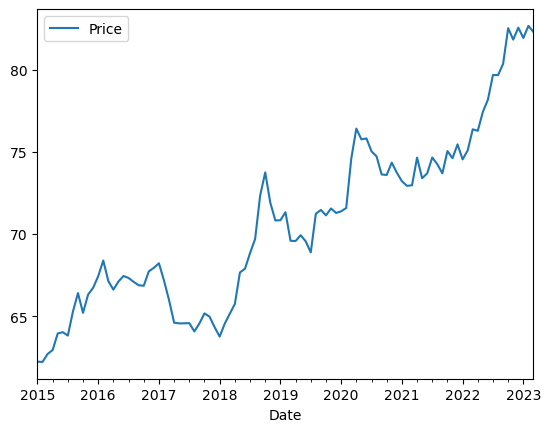

In [17]:
fig, ax = plt.subplots()
curr.plot(ax=ax)
plt.show()

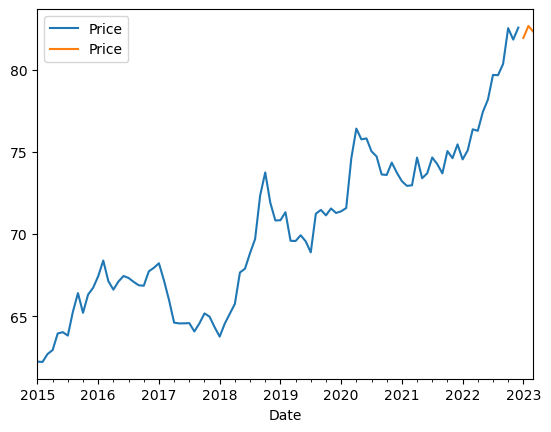

In [18]:
fig, ax1 = plt.subplots()
curr_train.plot(ax=ax1)
curr_test.plot(ax=ax1)
plt.show()

In [19]:
result = adfuller(curr)
print(result)

(-0.21574381811067747, 0.9366187918712089, 0, 98, {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}, 238.24543473190732)


In [20]:
result = adfuller(curr.diff().dropna())
print(result)

(-9.038382177901815, 5.213747092463019e-15, 0, 97, {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}, 235.0912767363446)


In [21]:
result = adfuller(np.sqrt(curr))
print(result)

(-0.32233171392932874, 0.9222814026509241, 0, 98, {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}, -248.9881808797128)


In [22]:
result = adfuller(np.log(curr))
print(result)

(-0.4293114452738701, 0.9050885883928232, 0, 98, {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}, -497.476375373764)


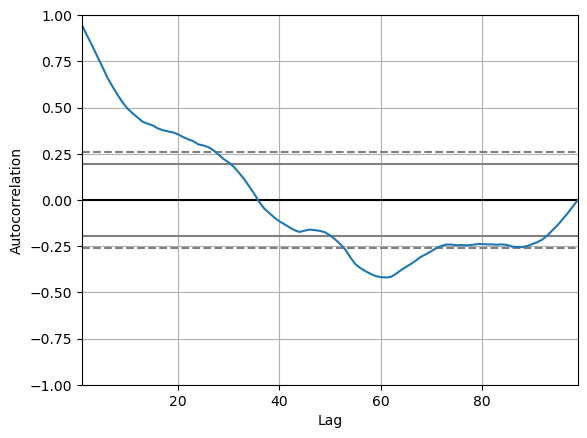

In [51]:
autocorrelation_plot(curr)
plt.show()

In [23]:
curr_diff = curr.diff().dropna()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


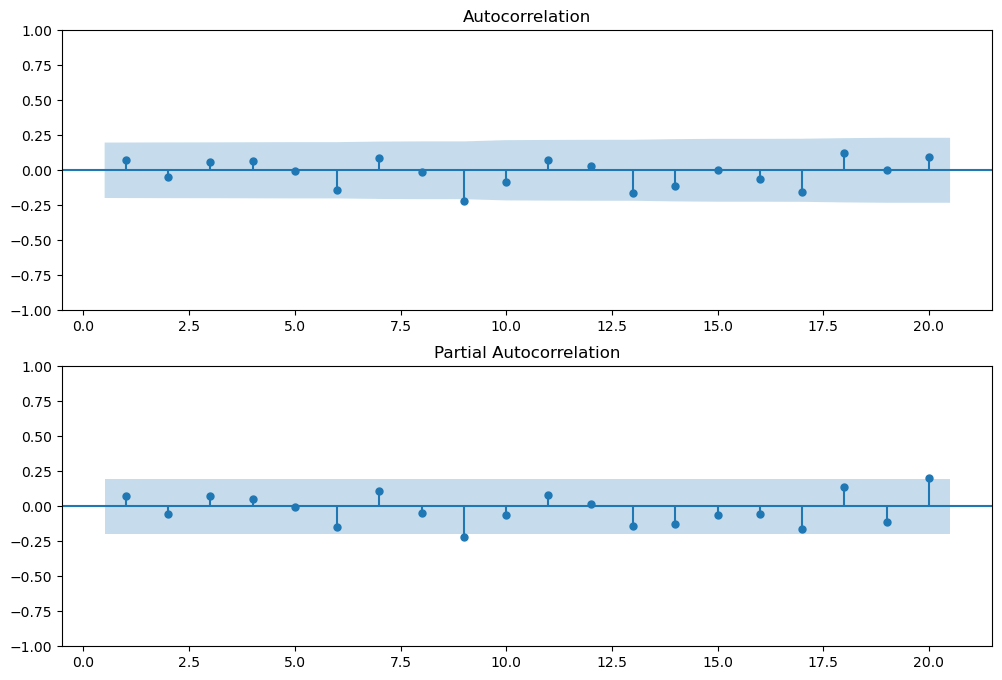

In [24]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

plot_acf(curr_diff, lags=20, zero=False, ax=ax1)

plot_pacf(curr_diff, lags=20, zero=False, ax=ax2)

plt.show()

In [25]:
order_aic_bic=[]


            
            
for p in range(5):
    for q in range(5):
        try:
            model = ARIMA(curr_train, order=(p,1,q))
            results = model.fit()
            
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

In [26]:
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])

print(order_df.sort_values('aic'))

    p  q         aic         bic
0   0  0  262.564400  265.118277
1   0  1  262.690177  267.797931
5   1  0  262.862196  267.969950
6   1  1  263.518852  271.180483
2   0  2  264.430779  272.092410
3   0  3  264.517160  274.732667
15  3  0  264.648828  274.864335
10  2  0  264.737632  272.399262
11  2  1  265.493169  275.708677
18  3  3  265.908397  283.785535
8   1  3  266.106865  278.876249
14  2  4  266.212456  284.089595
16  3  1  266.352626  279.122011
4   0  4  266.368672  279.138057
7   1  2  266.368782  276.584289
20  4  0  266.385577  279.154962
12  2  2  266.762837  279.532221
19  3  4  267.437430  287.868446
13  2  3  268.034256  283.357517
9   1  4  268.082551  283.405812
17  3  2  268.324522  283.647783
21  4  1  268.342620  283.665881
24  4  4  269.263678  292.248570
22  4  2  270.002266  287.879405
23  4  3  271.041616  291.472631


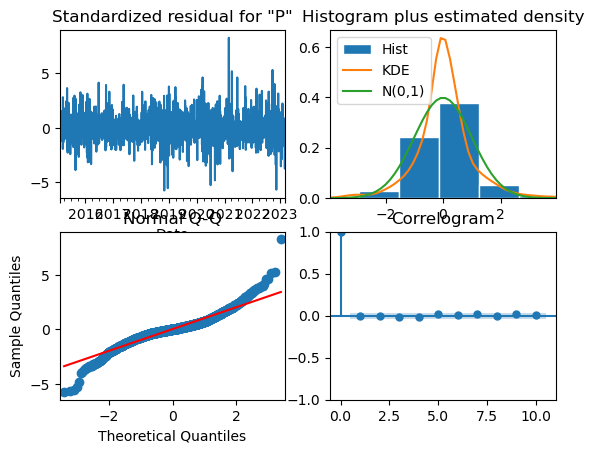

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2960
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 981.266
Date:                Tue, 04 Apr 2023   AIC                          -1958.532
Time:                        22:22:16   BIC                          -1946.547
Sample:                    01-30-2015   HQIC                         -1954.218
                         - 03-08-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0828      0.014      5.848      0.000       0.055       0.111
sigma2         0.0302      0.000     73.120      0.000       0.029       0.031
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [51]:
model = ARIMA(curr_train, order=(0,1,1))
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

In [27]:
order_aic_bic2=[]


            
            
for p in range(5,9):
    for q in range(5,9):
        try:
            model = ARIMA(curr_train, order=(p,1,q))
            results = model.fit()
            
            order_aic_bic2.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood op

In [28]:
order_df2 = pd.DataFrame(order_aic_bic2, columns=['p', 'q', 'aic', 'bic'])

print(order_df2.sort_values('aic'))

    p  q         aic         bic
5   6  6  269.211850  302.412249
1   5  6  270.250837  300.897360
9   7  6  271.160093  306.914369
0   5  5  271.343569  299.436215
2   5  7  272.323417  305.523817
10  7  7  272.922713  311.230866
4   6  5  273.369761  304.016283
14  8  7  273.517607  314.379638
6   6  7  274.480636  310.234913
8   7  5  274.541383  307.741783
7   6  8  275.675997  313.984151
3   5  8  276.403745  312.158021
15  8  8  276.573206  319.989113
12  8  5  276.848699  312.602976
13  8  6  277.834284  316.142438
11  7  8  280.412730  321.274760


In [29]:
order_aic_bic3=[]
            
for p in range(9,12):
    for q in range(9,12):
        try:
            model = ARIMA(curr_train, order=(p,1,q))
            results = model.fit()
            
            order_aic_bic3.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels

In [30]:
order_df3 = pd.DataFrame(order_aic_bic3, columns=['p', 'q', 'aic', 'bic'])

print(order_df3.sort_values('aic'))

    p   q         aic         bic
0   9   9  278.631126  327.154787
1   9  10  280.759007  331.836544
4  10  10  281.390501  335.021916
2   9  11  281.759077  335.390491
6  11   9  282.096774  335.728189
3  10   9  282.562254  333.639792
7  11  10  283.379207  339.564498
5  10  11  284.063838  340.249130
8  11  11  285.956044  344.695213


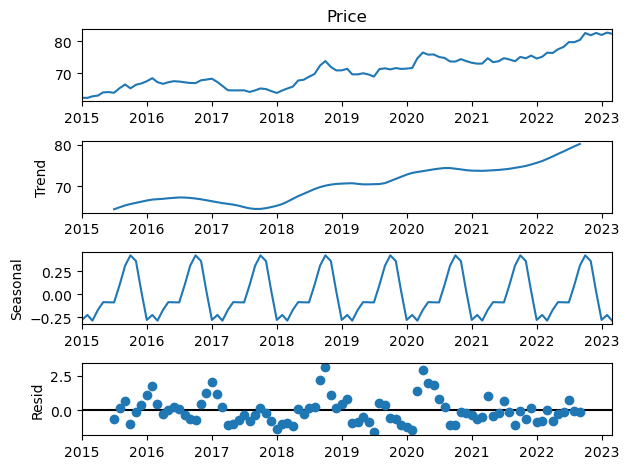

In [33]:
decomp = seasonal_decompose(curr.Price, period=12)

decomp.plot()
plt.show()

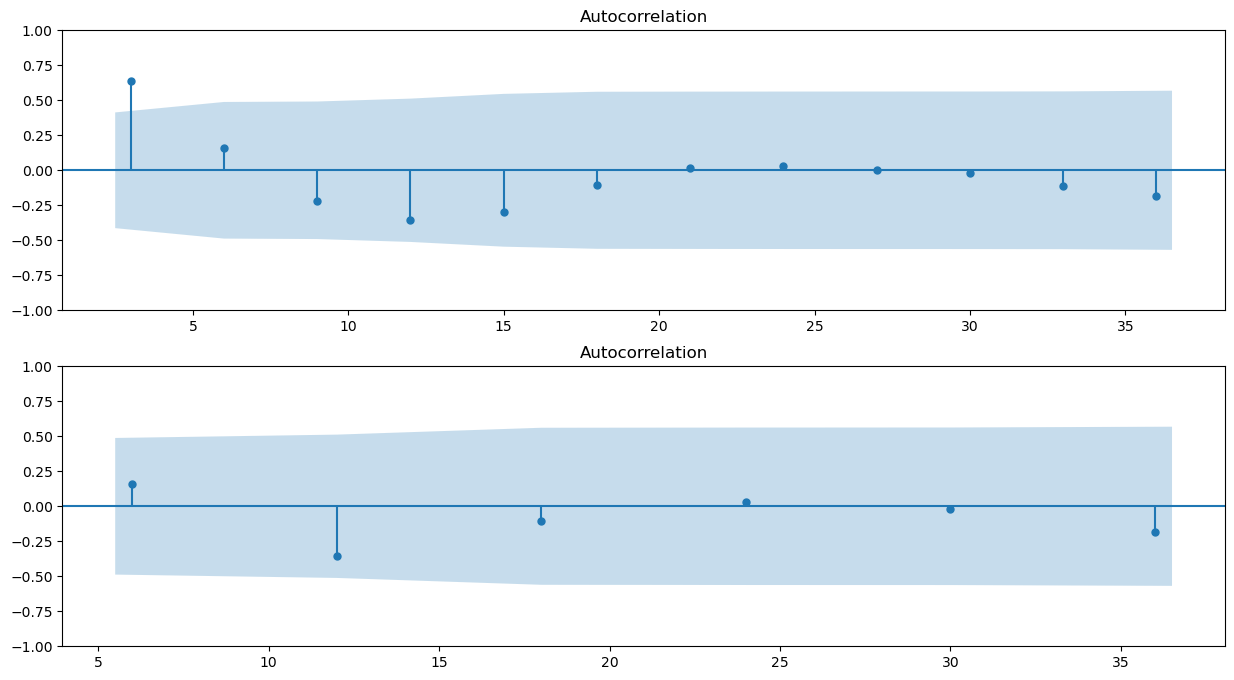

In [42]:
curr_month = curr - curr.rolling(15).mean()
curr_month = curr_month.dropna()

lagq = [3,6,9,12,15,18,21,24,27,30,33,36]
lagh = [6,12,18,24,30,36]
lagy = [12,24,36]

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,8))

plot_acf(curr_month.Price, lags=lagq, zero=False, ax=ax1)
plot_acf(curr_month.Price, lags=lagh, zero=False, ax=ax2)

plt.show()

In [43]:
sorder_aic_bic=[]

for r in range(3):
    for s in range(3):
        for p in range(3):
            for q in range(3):
                try:
                    model = SARIMAX(curr_train, order=(r,1,s), seasonal_order=(p,1,q,3))
                    results = model.fit()

                    sorder_aic_bic.append((r, s, p, q, results.aic, results.bic))
                except:
                        print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\hp\anaconda3\lib\site-packages\statsmod

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Convergen

In [44]:
sorder_df = pd.DataFrame(sorder_aic_bic, columns=['r', 's', 'p', 'q', 'aic', 'bic'])

print(sorder_df.sort_values('aic'))

    r  s  p  q         aic         bic
1   0  0  0  1  264.281676  269.325253
2   0  0  0  2  265.035634  272.600999
10  0  1  0  1  265.127774  272.693140
4   0  0  1  1  265.257446  272.822812
28  1  0  0  1  265.323599  272.888965
.. .. .. .. ..         ...         ...
54  2  0  0  0  304.162073  311.727439
0   0  0  0  0  304.424445  306.946234
9   0  1  0  0  304.507240  309.550817
27  1  0  0  0  304.914800  309.958377
18  0  2  0  0  305.905641  313.471007

[81 rows x 6 columns]


In [38]:
sorder_aic_bic1=[]

for r in range(3,6):
    for s in range(3,6):
        for p in range(3,6):
            for q in range(3,6):
                try:
                    model = SARIMAX(curr_train, order=(r,1,s), seasonal_order=(p,1,q,12))
                    results = model.fit()

                    sorder_aic_bic1.append((r, s, p, q, results.aic, results.bic))
                except:
                        print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users

In [39]:
sorder_df1 = pd.DataFrame(sorder_aic_bic1, columns=['r', 's', 'p', 'q', 'aic', 'bic'])

print(sorder_df1.sort_values('aic'))

    r  s  p  q         aic         bic
9   3  4  3  3  270.995265  304.859033
54  5  3  3  3  271.615817  307.898426
57  5  3  4  3  272.055227  310.756677
12  3  4  4  3  272.612960  308.895569
0   3  3  3  3  272.684219  304.129147
.. .. .. .. ..         ...         ...
77  5  5  4  5  280.168128  328.544940
23  3  5  4  5  280.403484  323.942614
50  4  5  4  5  280.655367  326.613338
71  5  4  5  5  280.750382  329.127194
53  4  5  5  5  281.288218  329.665031

[81 rows x 6 columns]


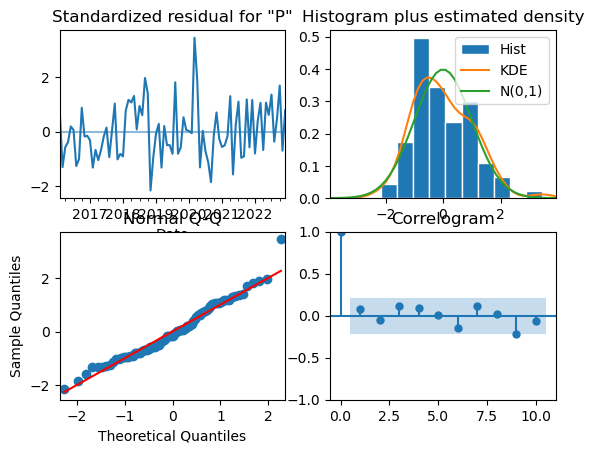

                                      SARIMAX Results                                       
Dep. Variable:                                Price   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -127.760
Date:                              Wed, 05 Apr 2023   AIC                            259.519
Time:                                      00:03:03   BIC                            264.357
Sample:                                  01-01-2015   HQIC                           261.463
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7881      0.182     -4.325      0.000      -1.145      -0.431
sigma2         1.10

In [45]:
model = SARIMAX(curr_train, order=(0,1,0), seasonal_order=(0,1,1,12))
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

In [46]:
forecast = results.get_forecast(steps=len(curr_test))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
dates = curr_test.index

In [47]:
print(len(curr_test))

3


In [48]:
print(len(mean))

3


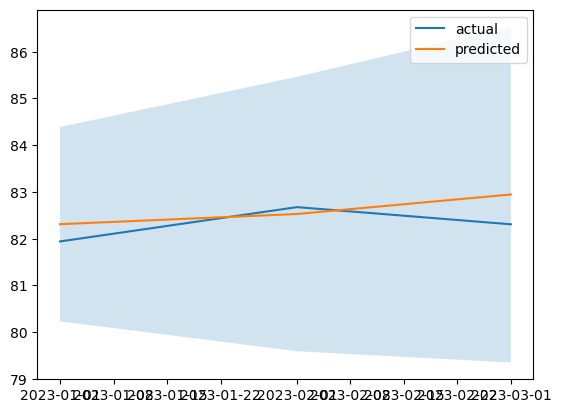

In [49]:
plt.figure()

plt.plot(curr_test.index, curr_test, label='actual')

plt.plot(dates, mean, label='predicted')

plt.fill_between(dates,conf_int['lower Price'], conf_int['upper Price'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [50]:
rms = sqrt(mean_squared_error(curr_test.Price,mean))
print(rms)

0.43386437679110224


In [52]:
curr_train = curr.loc[:'2021']
curr_test = curr.loc['2022':]

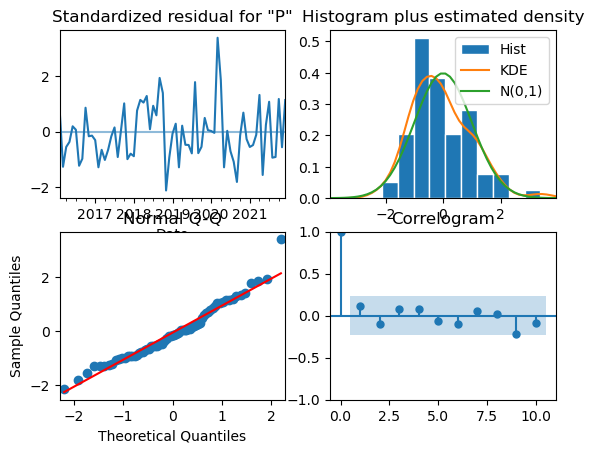

                                      SARIMAX Results                                       
Dep. Variable:                                Price   No. Observations:                   84
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -110.992
Date:                              Wed, 05 Apr 2023   AIC                            225.985
Time:                                      09:59:01   BIC                            230.510
Sample:                                  01-01-2015   HQIC                           227.784
                                       - 12-01-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8117      0.287     -2.826      0.005      -1.375      -0.249
sigma2         1.12

In [53]:
model = SARIMAX(curr_train, order=(0,1,0), seasonal_order=(0,1,1,12))
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

In [54]:
forecast = results.get_forecast(steps=len(curr_test))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
dates = curr_test.index

In [55]:
print(len(curr_test))

15


In [56]:
print(len(mean))

15


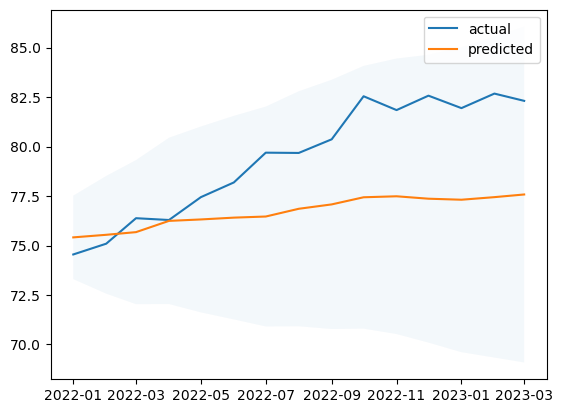

In [59]:
plt.figure()

plt.plot(curr_test.index, curr_test, label='actual')

plt.plot(dates, mean, label='predicted')

plt.fill_between(dates,conf_int['lower Price'], conf_int['upper Price'], alpha=0.05)

# Plot legend and show figure
plt.legend()
plt.show()

In [58]:
rms = sqrt(mean_squared_error(curr_test.Price,mean))
print(rms)

3.4478808263918665
